In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report
import pickle

In [2]:
import pandas as pd
import seaborn as sns
import string
import nltk
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.tokenize import word_tokenize

# Download necessary resources
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [5]:
# Load stopwords
stop = []
file_path = '/content/drive/My Drive/SoftStream.ai/NLP Assessment 1 (Sentiment)/stopwords.txt'
st = pd.read_csv(file_path, encoding="ISO-8859-1", header=None)
stop = list(st[0])
print(stop)

# Load the dataset
file_path = '/content/drive/My Drive/SoftStream.ai/NLP Assessment 1 (Sentiment)/IMDB_Dataset.csv'
data = pd.read_csv(file_path, usecols=[0, 1], names=['review', 'sentiment'], encoding="ISO-8859-1", header=None)


["'ll", "'tis", "'twas", "'ve", '10', '39', 'a', "a's", 'able', 'ableabout', 'about', 'above', 'abroad', 'abst', 'accordance', 'according', 'accordingly', 'across', 'act', 'actually', 'ad', 'added', 'adj', 'adopted', 'ae', 'af', 'affected', 'affecting', 'affects', 'after', 'afterwards', 'ag', 'again', 'against', 'ago', 'ah', 'ahead', 'ai', "ain't", 'aint', 'al', 'all', 'allow', 'allows', 'almost', 'alone', 'along', 'alongside', 'already', 'also', 'although', 'always', 'am', 'amid', 'amidst', 'among', 'amongst', 'amoungst', 'amount', 'an', 'and', 'announce', 'another', 'any', 'anybody', 'anyhow', 'anymore', 'anyone', 'anything', 'anyway', 'anyways', 'anywhere', 'ao', 'apart', 'apparently', 'appear', 'appreciate', 'appropriate', 'approximately', 'aq', 'ar', 'are', 'area', 'areas', 'aren', "aren't", 'arent', 'arise', 'around', 'arpa', 'as', 'aside', 'ask', 'asked', 'asking', 'asks', 'associated', 'at', 'au', 'auth', 'available', 'aw', 'away', 'awfully', 'az', 'b', 'ba', 'back', 'backed', 

In [6]:
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


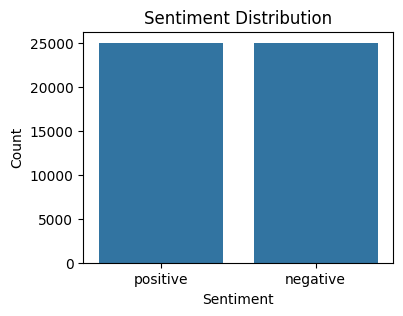

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the sentiment distribution
plt.figure(figsize=(4, 3))
sns.barplot(x=data['sentiment'].value_counts().index, y=data['sentiment'].value_counts().values)

# Add labels and title
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Sentiment Distribution')
plt.show()


In [8]:
# Preprocessing function
def review_preprocessing(input_review):
    input_review = input_review.astype(str).str.lower() # Convert to lower case
    input_review = input_review.astype(str).str.replace('[{}]'.format(string.punctuation), '') # Remove punctuation
    input_review = input_review.astype(str).str.replace("[^a-zA-Z#]", ' ') # Remove special characters
    input_review = input_review.apply(remove_numbers) # Remove numbers
    input_review = input_review.astype(str).str.strip() # Remove spaces
    return input_review

def remove_numbers(text):
    words = text.split()
    words = [word for word in words if not word.isdigit()]
    return ' '.join(words)


In [9]:
# Initialize the stemmer and lemmatizer
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()


# Lemmatization function
def lemmatize_sentences(text):
    words = word_tokenize(text)
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]
    return ' '.join(lemmatized_words)


In [10]:
# Apply preprocessing
data['review'] = review_preprocessing(data['review'])

# Apply stemming and lemmatization without using lambda
lemmatized_reviews = []

for review in data['review']:
    lemmatized_reviews.append(lemmatize_sentences(review))

# Add results back to the dataframe
data['review_lemmatized'] = lemmatized_reviews


In [11]:
# Remove duplicates
data = data.drop_duplicates(keep='first').reset_index(drop=True)

# Display the first few rows of the dataframe
print(data.head())


                                              review sentiment  \
0  one of the other reviewers has mentioned that ...  positive   
1  a wonderful little production. <br /><br />the...  positive   
2  i thought this was a wonderful way to spend ti...  positive   
3  basically there's a family where a little boy ...  negative   
4  petter mattei's "love in the time of money" is...  positive   

                                   review_lemmatized  
0  one of the other reviewer ha mentioned that af...  
1  a wonderful little production . < br / > < br ...  
2  i thought this wa a wonderful way to spend tim...  
3  basically there 's a family where a little boy...  
4  petter mattei 's `` love in the time of money ...  


In [12]:
# Apply lemmatization
data['review_processed'] = data['review'].apply(lemmatize_sentences)

# Split the data into training and testing sets
X = data['review_processed'].values
y = data['sentiment'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)


In [ ]:
# Save the processed data to a CSV file
file_path = '/content/drive/My Drive/SoftStream.ai/NLP Assessment 1 (Sentiment)/IMDB_Dataset_Processed.csv'
data.to_csv(file_path, index=False)

In [13]:
# Convert a collection of raw documents to a matrix of TF-IDF features
vectorizer = TfidfVectorizer(ngram_range=(1, 3))
X_train_vector = vectorizer.fit_transform(X_train)
X_test_vector = vectorizer.transform(X_test)

In [15]:
from sklearn.naive_bayes import MultinomialNB

In [ ]:
# Create and train the classifier
classifier = SVC(kernel='linear', C=1.0, degree=3, random_state=0)
classifier.fit(X_train_vector, y_train)

# ##Other classifiers can be used instead, like:


### Naive Bayes
# classifier = KNeighborsClassifier(n_neighbors=3)
# classifier.fit(X_train_vector, y_train)

###AdaBoost
# classifier = AdaBoostClassifier(n_estimators=50, learning_rate=1)
# classifier.fit(X_train_vector, y_train)

###RandomForest
# classifier = RandomForestClassifier(n_estimators=100, random_state=0)
# classifier.fit(X_train_vector, y_train)

###naive_bayes
# classifier = naive_bayes.MultinomialNB()
# classifier.fit(X_train_vector, y_train)

###LogisticRegression
# classifier = LogisticRegression(random_state=0, solver='liblinear', multi_class='ovr')
# classifier.fit(X_train_vector, y_train)


In [ ]:
# Predict the labels for the test set
y_pred = classifier.predict(X_test_vector)


In [ ]:
# Create a confusion matrix
ConfusionMatrix = confusion_matrix(y_test, y_pred)
print(ConfusionMatrix)

# Print the classification report
print(classification_report(y_test, y_pred))


In [ ]:
# Calculate and print accuracy
Accuracy = format(classifier.score(X_test_vector, y_test) * 100, '.2f') + ' %'
print(Accuracy)

# Save accuracy to a file
with open('AccuracyPercentage', 'wb') as file:
    pickle.dump(Accuracy, file)


In [ ]:
# Visualize the confusion matrix
labels = ['Positive', 'Negative']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(ConfusionMatrix)
plt.title('Confusion matrix of the classifier \n')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
